# tries to segment the bcs target with pretrained UNET

In [1]:
import torch
import numpy as np
import segmentation_models_pytorch as smp
import matplotlib.pyplot as plt
from glob import glob
import os
import cv2

c:\Users\qzheng\AppData\Local\anaconda3\envs\bcs\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


TypeError: Invalid shape (1024, 1376, 256) for image data

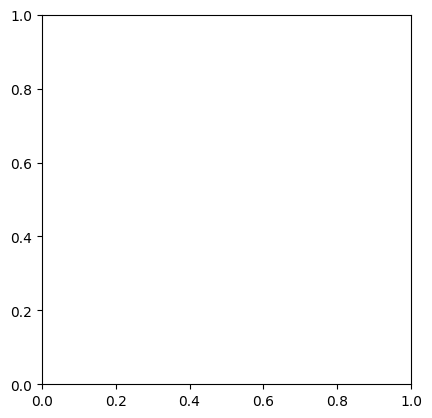

In [ ]:
data_date_folder = r'C:\Users\qzheng\OneDrive - NREL\BCS Comparison\CENER\data\raw_input\raw_input\CAT\03_22_2023\images'
data_format = "*.tif"
data_files = glob(os.path.join(data_date_folder, data_format))

img = cv2.imread(data_files[0])
model_input_size = (256, 256)
original_img_shape = img.shape
resized_img = cv2.resize(img, model_input_size) / 255.0
input_tensor = torch.tensor(resized_img).permute(2, 0, 1).unsqueeze(0).float()
model = smp.Unet(encoder_name="resnet34", encoder_weights="imagenet", in_channels=3, classes=2)
model.eval()

with torch.no_grad():
    output = model(input_tensor)
    output = torch.sigmoid(output)
    output = output.squeeze().numpy()

output_mask
